In [ ]:
import pandas as pd
import re
import openpyxl
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
from bokeh.plotting import figure, show
from bokeh.io import output_notebook
from bokeh.models import Label
from bokeh.models import ColumnDataSource
from bokeh.transform import dodge
from bokeh.io import output_notebook
from bokeh.models import NumeralTickFormatter
import jdatetime
import pandas as pd
import random
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## Coffee Website Analysis


In [33]:
df = pd. read_excel("/Users/mohammad/Downloads/Coffee_site_data.xlsx")

# Function to jus choose the name of good from path
def change_name(string):
    changed_str = string.split("/")[-2]
    parts = changed_str.split('-')
    
    # Capitalize the first letter of each part and join them with a space
    transformed_string = ' '.join(part.capitalize() for part in parts)
    return transformed_string

# Function to create a dict to be able to be used fo`r plotting
def dict_creator(df,metric):
    plot_dict = {}
    for i in df.index.to_list():
        name = df.loc[i,"Page path and screen class"]
        value = df.loc[i,f"{metric}"]
        plot_dict[name] = value
    return plot_dict


# Function to create a plot Based on dict

def plot(dict1,title,yaxis_title):
    x = list(dict1.keys())
    y = list(dict1.values())

    # Create a ColumnDataSource
    purple_palette = [
        "#E6E6FA", "#D8BFD8", "#DDA0DD", "#EE82EE", "#DA70D6",
        "#BA55D3", "#9932CC", "#9400D3", "#8A2BE2", "#A020F0",
        "#9370DB", "#7B68EE", "#6A5ACD", "#483D8B", "#4B0082",
        # Add more purple colors as needed
    ]

    # Randomly select colors from the extended nude palette
    colors = [purple_palette[random.randint(0, len(purple_palette) - 1)] for _ in range(len(x))]
    source = ColumnDataSource(data=dict(x=x, y=y, color=colors))

    # Create the figure
    p = figure(x_range=x, height=700, width=1100,
            toolbar_location=None, tools="")
    p.add_layout(Title(text=f"{title}", align="center"), "above")



    # Render the bars
    p.vbar(x='x', top='y', width=0.5, source=source, color="color")
    p.yaxis.axis_label = f'{yaxis_title}'


    # Customize the plot
    p.xgrid.grid_line_color = None
    p.y_range.start = 0
    p.xaxis.major_label_orientation = 45  # Adjust the angle of the x-axis labels
    if len(x) == 1:
        x_offset = 350
    elif len(x) == 2:
        x_offset = 220
    elif len(x) == 3:
        x_offset = 70
    elif len(x) == 4:
        x_offset = 110
    elif len(x) == 5:
        x_offset = 85
    elif len(x) ==  6 :
        x_offset = 70
    elif len(x) == 7:
        x_offset = 40
    elif len(x) == 8 :
        x_offset = 55
    elif len(x) == 9:
        x_offset= 40
    elif len(x) == 10:
        x_offset = 50
    elif len(x)>10:
        x_offset=35


    for i, value in enumerate(y):
        label = Label(x=i, y=value, text=str(round(value, 2)), text_baseline='middle', text_align='center', text_font_size="8pt", x_offset=x_offset, y_offset=10)
        p.add_layout(label)

    # Show the plot
    output_notebook()
    show(p)

#-----------------------------------------------------------------------------------------------------------------------------------------------------

# Creating V Series Coffee Data
v_df = df[df["Series"]==5]
# Creating A Series Coffee Data
a_df = df[df["Series"]==3]
# Creating X Series Coffee Data
x_df = df[df["Series"]==1]
# Creating Sample Box Coffee Data
s_df = df[df["Series"]==6]


# Renaming 
v_df["Page path and screen class"] = v_df["Page path and screen class"].apply(change_name)
# Renaming 
a_df["Page path and screen class"] = a_df["Page path and screen class"].apply(change_name)
# Renaming 
x_df["Page path and screen class"] = x_df["Page path and screen class"].apply(change_name)

# Creatig dict for plot cummulative 
v_df_views = sum(v_df["Users"].to_list())
v_df_eng = sum(v_df["Average engagement time"].to_list())/ (len(v_df))
v_df_watch = sum(v_df["Watch"].to_list())

a_df_views = sum(a_df["Users"].to_list())
a_df_eng = sum(a_df["Average engagement time"].to_list())/ (len(a_df))
a_df_watch = sum(a_df["Watch"].to_list())


x_df_views = sum(x_df["Users"].to_list())
x_df_eng = sum(x_df["Average engagement time"].to_list())/ (len(x_df))
x_df_watch = sum(x_df["Watch"].to_list())


s_df_views = sum(s_df["Users"].to_list())
s_df_eng = sum(s_df["Average engagement time"].to_list())/ (len(s_df))
s_df_watch = sum(s_df["Watch"].to_list())


views_cummulative_dict = {"V Series":v_df_views, "A Series":a_df_views, "X Series":x_df_views , "Sample Box": s_df_views }
eng_cummulative_dict = {"V Series":v_df_eng, "A Series":a_df_eng, "X Series":x_df_eng, "Sample Box": s_df_eng }
watch_cummulative_dict = {"V Series":v_df_watch, "A Series":a_df_watch, "X Series":x_df_watch, "Sample Box": s_df_watch }


plot(views_cummulative_dict, "Page Views of Each Series", "Views")
plot(eng_cummulative_dict, "Page Average engagement time of Each Series", "Seconds\n")
plot(watch_cummulative_dict, "Page WatchTime of Each Series", "Minutes")




# creating Plot for views
plot_dict = dict_creator(v_df,"Views")
plot(plot_dict, "Page Views of V Series Coffee", "Views")

# creating Plot for Engagement
plot_dict = dict_creator(v_df,"Average engagement time")
plot(plot_dict, "Page Average engagement time of V Series Coffee", "Seconds\n")

# creating Plot for Watch Time
plot_dict = dict_creator(v_df,"Watch")
plot(plot_dict, "Page WatchTime of V Series Coffee", "Minutes")

# creating Plot for views
plot_dict = dict_creator(a_df,"Views")
plot(plot_dict, "Page Views of A Series Coffee", "Views")

# creating Plot for Engagement
plot_dict = dict_creator(a_df,"Average engagement time")
plot(plot_dict, "Page Average engagement time of A Series Coffee", "Seconds\n")

# creating Plot for Watch Time
plot_dict = dict_creator(a_df,"Watch")
plot(plot_dict, "Page WatchTime of A Series Coffee", "Minutes")

# creating Plot for views
plot_dict = dict_creator(x_df,"Views")
plot(plot_dict, "Page Views of X Series Coffee", "Views")

# creating Plot for Engagement
plot_dict = dict_creator(x_df,"Average engagement time")
plot(plot_dict, "Page Average engagement time of X Series Coffee", "Seconds\n")

# creating Plot for Watch Time
plot_dict = dict_creator(x_df,"Watch")
plot(plot_dict, "Page WatchTime of X Series Coffee", "Minutes")
#--------------------------------------------------------------------------------------------------------------------------------------------------



/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_91805/2287349254.py:101: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v_df["Page path and screen class"] = v_df["Page path and screen class"].apply(change_name)
/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_91805/2287349254.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a_df["Page path and screen class"] = a_df["Page path and screen class"].apply(change_name)
/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_91805/22873

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## Articles Website Analysis

In [34]:
df = pd. read_excel("/Users/mohammad/Downloads/Articles_website.xlsx")

# page_eng_dict = {"Barista" : 87, "Researcher": 73, "Home Barista": 51}
# page_view_dict = {"Barista" : 3506, "Researcher": 1596, "Home Barista": 1177}
# plot(page_view_dict, "Page Engagement of Articles", "View")
# plot(page_eng_dict, "Page Engagement of Articles", "Seconds")

plot_dict = dict_creator(df,"Views")
plot(plot_dict, "Page Views of Each Article", "Views")


plot_dict = dict_creator(df,"Engagement")
plot(plot_dict, "Page Engagement of Each Article", "Seconds")

plot_dict = dict_creator(df,"Watch")
plot(plot_dict, "Page WatchTime of Each Article", "Minutes")

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

## Workshop & Courses 

In [35]:
df = pd.read_excel("/Users/mohammad/Downloads/site_page_data.xlsx")

# Import Link of Workshop And Courses
roast_courses = ["/product/barista-level1/", "/product/sensory-level1/", "/product/roast-level1/", "/product/greencoffee-level2/",
                  "/product/sensory-level2/", "/product/roast-level2/"]

barista_courses = ["/product/barista-level1/", "/product/sensory-level1/", "/product/greencoffee-level2/", 
                        "/product/sensory-level2/", "/product/brewing-level2/", "/product/espresso-level2/"]

home_courses = ["/product/introduction-to-coffee/", "/product/how-to-buy-coffee/", "/product/how-to-make-coffee/"]

workshops = ["/product/introduction-to-coffee/", "/product/how-to-buy-coffee/", "/product/how-to-make-coffee/","/product/scientific-review-of-espresso/", "/product/enhance-sensory-memory/", "/product/water-and-effective-solutes/",
              "/product/coffee-fermentation-and-processing-methods/", "/product/cupping-workshop-2/", "/product/the-specialized-language-of-coffee/",
              "/product/production-management/", "/product/coffee-geography/", "/product/greencoffee-grading/", "/product/investigate-roasting-deffects/",
              "/product/preparations-for-coffee-competitions/", "/product/coffee-researcher-project/"]


def plot_2 (df,link_list,metric,title,y_axis_title) :
    df_filtered = df[df["Page path and screen class"].isin(link_list)]
    df_filtered["Page path and screen class"] = df_filtered["Page path and screen class"].apply(change_name)

    plot_dict = dict_creator(df_filtered,metric)
    return plot(plot_dict, title, y_axis_title)
plot_2(df,roast_courses,"Views","Page View of Roasting Courses","Views")


/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_91805/624890793.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Page path and screen class"] = df_filtered["Page path and screen class"].apply(change_name)


Loading BokehJS ...

In [36]:
plot_2(df,barista_courses,"Views","Page View of Barista Courses","Views")


/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_91805/624890793.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Page path and screen class"] = df_filtered["Page path and screen class"].apply(change_name)


Loading BokehJS ...

In [37]:
plot_2(df,workshops,"Views","Page View of Home Barista Course & Workshops","Views")


/var/folders/3x/g8h482h10276gxcssgwfxbyc0000gn/T/ipykernel_91805/624890793.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Page path and screen class"] = df_filtered["Page path and screen class"].apply(change_name)


Loading BokehJS ...

## City 

In [39]:
df = pd.read_excel("/Users/mohammad/Downloads/Website-city-data.xlsx")
df = df.head(10)
plot_dict = {}
for i in df.index.to_list():
    name = df.loc[i,"City"]
    value = df.loc[i,"Watch"]
    plot_dict[name] = value

plot(plot_dict, "WatchTime of Each City", "Hours")


Loading BokehJS ...

## Google Analytics with API

In [1]:
import numpy as np
import pandas as pd
import os
from google.analytics.data_v1beta import BetaAnalyticsDataClient
from google.analytics.data_v1beta.types import DateRange
from google.analytics.data_v1beta.types import Dimension
from google.analytics.data_v1beta.types import Metric
from google.analytics.data_v1beta.types import RunReportRequest
from google.analytics.data_v1beta.types import OrderBy

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/mohammad/Downloads/XAV Website For Analysis-a347d7173ab4.json"
property_id = '310415544'

client = BetaAnalyticsDataClient()
## Format Report - run_report method
def format_report(request):
    response = client.run_report(request)
    
    # Row index
    row_index_names = [header.name for header in response.dimension_headers]
    row_header = []
    for i in range(len(row_index_names)):
        row_header.append([row.dimension_values[i].value for row in response.rows])

    row_index_named = pd.MultiIndex.from_arrays(np.array(row_header), names = np.array(row_index_names))
    # Row flat data
    metric_names = [header.name for header in response.metric_headers]
    data_values = []
    for i in range(len(metric_names)):
        data_values.append([row.metric_values[i].value for row in response.rows])

    output = pd.DataFrame(data = np.transpose(np.array(data_values, dtype = 'f')), 
                          index = row_index_named, columns = metric_names)
    return output

request = RunReportRequest(
        property='properties/'+property_id,
        dimensions=[Dimension(name="month"), 
                    Dimension(name="sessionMedium")],
        metrics=[Metric(name="averageSessionDuration"), 
                 Metric(name="userEngagementDuration")],
        order_bys = [OrderBy(dimension = {'dimension_name': 'month'}),
                    OrderBy(dimension = {'dimension_name': 'sessionMedium'})],
        date_ranges=[DateRange(start_date="2023-02-21", end_date="today")],
    )

output_df = format_report(request)

output_df

averageSessionDuration  userEngagementDuration
month sessionMedium                                                
01    (none)                     288.349274                413726.0
      (not set)                  545.641113                 58520.0
      organic                    413.525177               1230356.0
      referral                   327.443634                177359.0
02    (none)                     286.834900                376260.0
      (not set)                  633.756409                 61750.0
      organic                    363.127502               1858335.0
      referral                   286.699005                171686.0
03    (none)                     383.647186                287123.0
      (not set)                  390.122009                 32612.0
      organic                    371.647522                843956.0
      referral                   279.537964                147992.0
04    (none)                     441.331573                132651.0
      (not set)                  597.881836                 14545.0
      organic                    378.212646                467535.0
      referral                   280.756226                101595.0
05    (none)                       5.059635                    43.0
      organic                     54.107140                    26.0
      referral                    91.081406                   101.0
06    (none)                       2.351088                     0.0
      organic                      5.123389                     2.0
07    (none)                       0.584534                     0.0
10    (none)                     282.686584                105304.0
      (not set)                  317.973450                  4716.0
      organic                    387.688141                168271.0
      referral                   142.779068                 10545.0
11    (none)                     286.361115                374080.0
      (not set)                  443.386108                 26779.0
      organic                    365.862091                764880.0
      referral                   234.571091                 93200.0
12    (none)                     319.542603                477849.0
      (not set)                  517.308350                 33051.0
      organic                    351.768829               1180702.0
      referral                   263.207031                171948.0

## GA4 Monthly Traffic Chart


In [25]:
from datetime import date
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns

monhtly_users_pivot = pd.pivot_table(output_df, 
                                     columns=['sessionMedium'], 
                                     index=['month'], 
                                     values=['userEngagementDuration'], 
                                     aggfunc = 'sum',
                                     fill_value=0).droplevel(0, axis=1)

monhtly_users_pivot

sessionMedium,(none),(not set),organic,referral
month,,,,
01,413726.0,58520.0,1230356.0,177359.0
02,376260.0,61750.0,1858335.0,171686.0
03,278066.0,38208.0,813974.0,143408.0
04,132651.0,14545.0,467535.0,101595.0
05,43.0,0.0,26.0,101.0
06,0.0,0.0,2.0,0.0
07,0.0,0.0,0.0,0.0
10,105304.0,4716.0,168271.0,10545.0
11,374080.0,26779.0,764880.0,93200.0


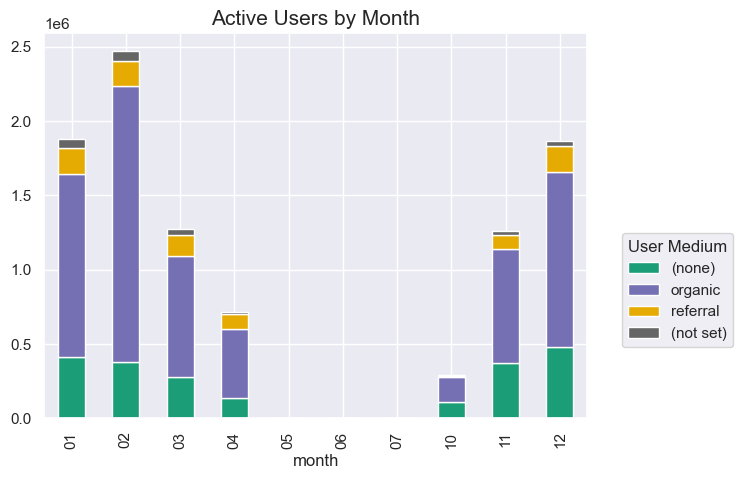

In [26]:
sns.set_theme()
monhtly_users_pivot.plot.bar(y = ['(none)', 'organic', 'referral', '(not set)'], stacked = True,
                             colormap = 'Dark2',
                             figsize=(7,5), title = 'Active Users by Month')
plt.legend(title = 'User Medium', bbox_to_anchor = (1.05, 0.5))
plt.title('Active Users by Month', fontsize = 15);


## GA4 Traffic Report


In [8]:
## Global variables
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "/Users/mohammad/Downloads/XAV Website For Analysis-a347d7173ab4.json"
property_id = '310415544'
client = BetaAnalyticsDataClient()

## Report dates
end_date = 'today' ## ("today" or "yyyy-mm-dd")
no_days = 366

In [9]:
def calc_start_date(end_date, no_days):
    if end_date == "today":
        start_date = date.today() - timedelta(days=no_days)
    else:
        start_date = date.fromisoformat(end_date) - timedelta(days=no_days)
        
    return start_date.strftime("%Y-%m-%d") 

def produce_report (end_date, no_days, property_id = property_id, client = client):
    daily_traffic_request = RunReportRequest(
            property='properties/'+property_id,
            dimensions=[Dimension(name="date"), 
                        Dimension(name="sessionMedium")],
            metrics=[Metric(name="activeUsers")],
            order_bys = [OrderBy(dimension = {'dimension_name': 'date'}),
                        OrderBy(dimension = {'dimension_name': 'sessionMedium'})],
            date_ranges=[DateRange(start_date=calc_start_date(end_date, no_days), end_date=end_date)],
        )
    
    page_users_request = RunReportRequest(
            property='properties/'+property_id,
            dimensions=[Dimension(name="pagePath")],
            metrics=[Metric(name="activeUsers")],
            order_bys = [OrderBy(metric = {'metric_name': 'activeUsers'}, desc = True)],
            date_ranges=[DateRange(start_date=calc_start_date(end_date, no_days), end_date=end_date)],
        )
    
    
    landing_page_users_request = RunReportRequest(
            property='properties/'+property_id,
            dimensions=[Dimension(name="landingPage")],
            metrics=[Metric(name="activeUsers")],
            order_bys = [OrderBy(metric = {'metric_name': 'activeUsers'}, desc = True)],
            date_ranges=[DateRange(start_date=calc_start_date(end_date, no_days), end_date=end_date)],
        )

    daily_traffic = format_report(daily_traffic_request).reset_index()
    active_users_pivot = pd.pivot_table(daily_traffic, 
                                     columns=['sessionMedium'], 
                                     index=['date'], 
                                     values=['activeUsers'], 
                                     aggfunc = 'sum',
                                     fill_value=0).droplevel(0, axis=1)
    active_users_pivot.index = active_users_pivot.index.str.slice(start=4)
    
    # Produce pie and line charts
    
    # fig, (axs1, axs2) = plt.subplots(1,2, figsize = (14, 4), gridspec_kw={'width_ratios': [1, 2]})
    # pie_data = daily_traffic.groupby(by = ['sessionMedium']).sum().sort_values(by = ['activeUsers'], ascending = False)
    # pie_data.index = pie_data.index.tolist()
    # pie_data.plot.pie(ax = axs1,
    #                 colormap = 'Dark2',
    #                 y = ['activeUsers'],
    #                 title = 'Active Users by Medium',
    #                 legend = False, 
    #                 label = False,
    #                 startangle = 0, 
    #                 autopct = lambda p:f'{p:.0f}%').set_ylabel('')
    
    # active_users_pivot.plot.line(ax = axs2, 
    #                              colormap = 'Dark2',
    #                              y = pie_data.index, 
    #                              title = 'Active Users by Day')


    # axs2.legend(title = 'User Medium', bbox_to_anchor = (1.05, 0.6))

    # plt.show();
    
    # Produce Top 10 pgaes output tables
    landing_table = format_report(landing_page_users_request)
    landing_table['activeUsers'] = landing_table['activeUsers'].astype('int') 
    page_users_table = format_report(page_users_request)
    page_users_table['activeUsers'] = page_users_table['activeUsers'].astype('int') 
    
    print('\nTop 10 Landing Pages')
    display(landing_table[0:10])
    print('\nTop 10 Visited Pages')
    display(page_users_table[0:10])


In [10]:
produce_report(end_date, no_days)



Top 10 Landing Pages


,activeUsers
landingPage,
/,9741
/product-category/coffee,4923
,3571
(not set),1817
/product/vortex-specialty-blend,680
/calendar,638
/cart,593
/3-main-types-of-coffee-processing,527
/maps/rosetocafe,478



Top 10 Visited Pages


,activeUsers
pagePath,
/,14193
/product-category/coffee/,13055
/cart/,4685
/product/vortex-specialty-blend/,3982
/product/sample-box/,3776
/product/peru-huancayo/,3142
/product/ethiopia-heirloom-hambella/,2840
/product/ethiopia-sidama/,2830
/product/brazil-cerrado-de-minas/,2560
